# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [26]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

print(male_df['Height'].mean())
print(male_df['Height'].std())
print(male_df['Weight'].mean())
print(male_df['Weight'].std())  
print(female_df['Height'].mean())
print(female_df['Height'].std())
print(female_df['Weight'].mean())
print(female_df['Weight'].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621737
2.8633622286606517
187.0206206581929
19.781154516763813
63.708773603424916
2.696284015765056
135.8600930074687
19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<function matplotlib.pyplot.show(*args, **kw)>

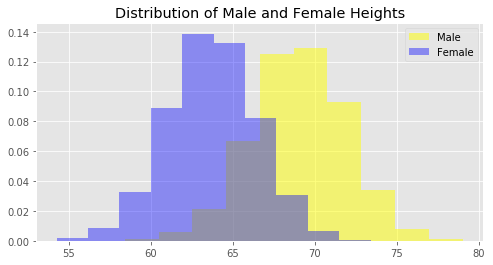

In [52]:
fig = plt.figure(figsize=(8,4))
plt.title('Distribution of Male and Female Heights')
ax1= fig.add_subplot(111)
ax2= fig.add_subplot(111)

ax1.hist(male_df['Height'], bins=10, alpha=.5, color='yellow', label = "Male", normed=True)
ax2.hist(female_df['Height'], bins=10, alpha=.4, color='blue', label='Female', normed=True)
plt.legend()
plt.show

They're both normally distributed, with females tending to be shorter than males. 

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

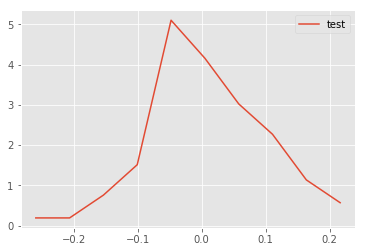

In [51]:
def density(X):
    _x, _y = np.histogram(X, 10, density=1)
    
    pdfx = np.zeros(_x.size)
    pdfy = np.zeros(_x.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(_x.size):
        pdfx[k] = 0.5*(_y[k]+_y[k+1])
        pdfy[k] = _x[k]
        
    return pdfx, pdfy
    



#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

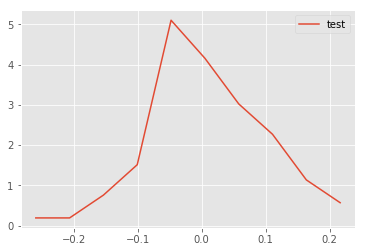

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

<function matplotlib.pyplot.show(*args, **kw)>

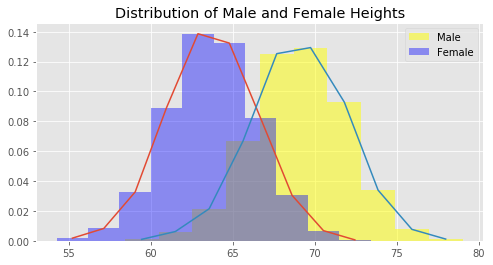

In [67]:
fig = plt.figure(figsize=(8,4))
plt.title('Distribution of Male and Female Heights')

plt.hist(male_df['Height'], bins=10, alpha=.5, color='yellow', label = "Male", density=True)
plt.hist(female_df['Height'], bins=10, alpha=.4, color='blue', label='Female', density=True)

a, b = density(female_df['Height'])
c, d = density(male_df['Height'])
plt.plot(a,b)
plt.plot(c,d)
plt.legend()
plt.show# You code here 

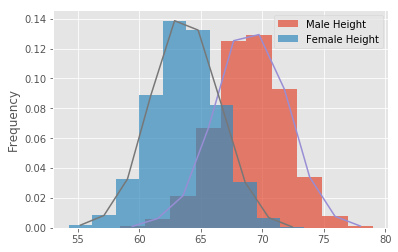

#### Repeat above exerice for male and female weights

<function matplotlib.pyplot.show(*args, **kw)>

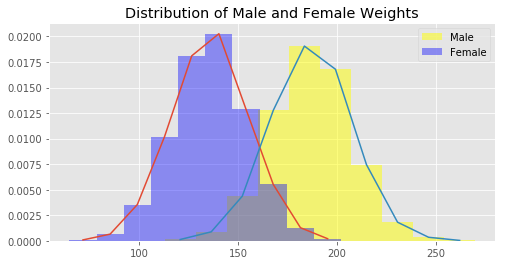

In [71]:
fig = plt.figure(figsize=(8,4))
plt.title('Distribution of Male and Female Weights')

plt.hist(male_df['Weight'], bins=10, alpha=.5, color='yellow', label = "Male", density=True)
plt.hist(female_df['Weight'], bins=10, alpha=.4, color='blue', label='Female', density=True)

a, b = density(female_df['Weight'])
c, d = density(male_df['Weight'])
plt.plot(a,b)
plt.plot(c,d)
plt.legend()
plt.show# Your code here 

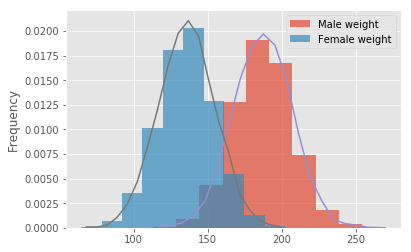

#### Write your observations in the cell below.

Females have a higher kertosis, meaning the heights are more common at the median. Men have a farther spread though. Women Peal around 140, where men peak around 180. They almost mirror eachother in a strange way though. 



# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

<function matplotlib.pyplot.show(*args, **kw)>

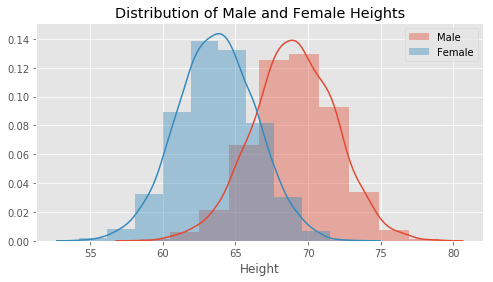

In [68]:
import seaborn as sns
fig = plt.figure(figsize=(8,4))
plt.title('Distribution of Male and Female Heights')
# ax1= fig.add_subplot(111)
# ax2= fig.add_subplot(111)

# ax1.hist(male_df['Height'], bins=10, alpha=.5, color='yellow', label = "Male", normed=True)
# ax2.hist(female_df['Height'], bins=10, alpha=.4, color='blue', label='Female', normed=True)
sns.distplot(male_df['Height'], kde=True, hist=True, label="Male", bins=10)
sns.distplot(female_df['Height'], kde=True, hist=True, label="Female", bins=10)

plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

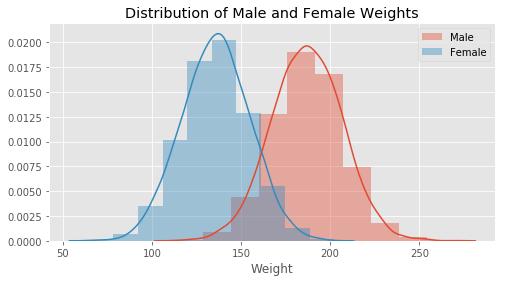

In [69]:
fig = plt.figure(figsize=(8,4))
plt.title('Distribution of Male and Female Weights')

sns.distplot(male_df['Weight'], kde=True, hist=True, label="Male", bins=10)
sns.distplot(female_df['Weight'], kde=True, hist=True, label="Female", bins=10)

plt.legend()
plt.show# Your code here 

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.